### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [8]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [11]:
missing = data.isnull().sum().sort_values()
print(missing)

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [14]:
data['Bar'] = data['Bar'].fillna(0)
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(0)
data['CarryAway'] = data['CarryAway'].fillna(0)
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(0)
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(0)

4. What proportion of the total observations chose to accept the coupon?



In [17]:
proportion_of_coupon_accepted = data['Y'].sum()/data.shape[0]
print(proportion_of_coupon_accepted)

0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

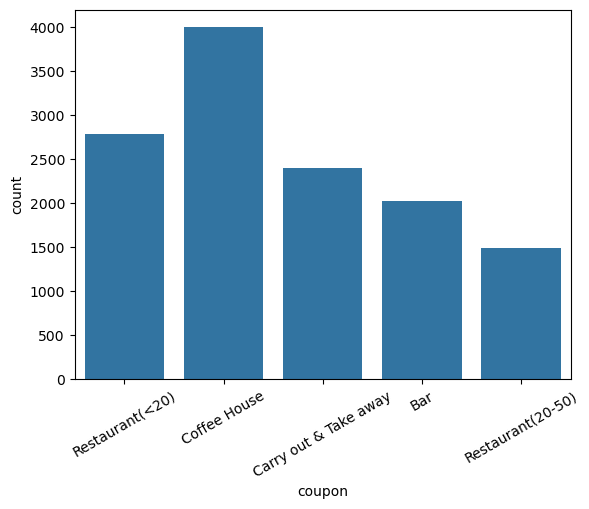

In [20]:
sns.countplot(x = 'coupon', data = data)
plt.xticks(rotation=30)
plt.show()

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

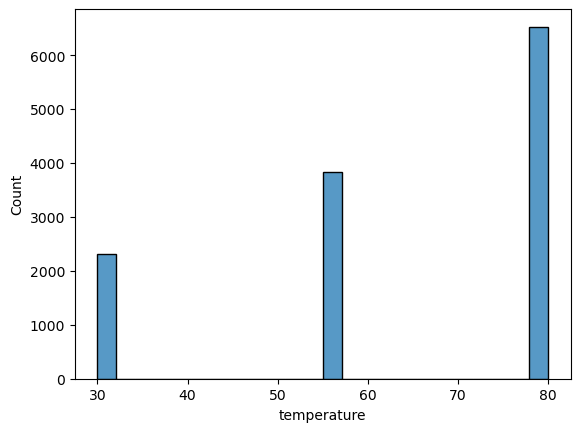

In [23]:
sns.histplot(data = data, x = 'temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [30]:
bar_coupon_df = data.loc[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [33]:
proportion_of_bar_coupon_accepted = bar_coupon_df['Y'].sum()/bar_coupon_df.shape[0]
print(proportion_of_bar_coupon_accepted)

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [36]:
#print(bar_coupon_df['Bar'].value_counts())
status_3_or_less = ['never', 'less1', '1~3', '0'] 
status_4_or_greater = ['4~8', 'gt8']
three_or_fewer = bar_coupon_df.query('Bar in @status_3_or_less')
acceptance_3_or_fewer = three_or_fewer['Y'].sum()/three_or_fewer.shape[0]
four_or_greater = bar_coupon_df.query('Bar in @status_4_or_greater')
acceptance_4_or_more = four_or_greater['Y'].sum()/four_or_greater.shape[0]
print("Acceptance rate for those who went to a bar 3 or fewer times " + str(acceptance_3_or_fewer))
print("Acceptance rate for those who went to a bar 4 or more times " + str(acceptance_4_or_more))

Acceptance rate for those who went to a bar 3 or fewer times 0.37061769616026713
Acceptance rate for those who went to a bar 4 or more times 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [47]:
#print(bar_coupon_df['age'].value_counts())
statuses = ['4~8', 'gt8', '1~3']
#bar_coupon_df['age'] = bar_coupon_df['age'].str.replace('below21', '20')
#bar_coupon_df['age'] = bar_coupon_df['age'].str.replace('50plus', '51')
#bar_coupon_df['age'] = bar_coupon_df['age'].astype(int)
queried_df = bar_coupon_df.query('Bar in @statuses & age > 25')
not_queried_df = bar_coupon_df.query('Bar not in @statuses | age <= 25')
acceptance_queried = queried_df['Y'].sum()/queried_df.shape[0]
acceptance_not_queried = not_queried_df['Y'].sum()/not_queried_df.shape[0]
print("Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 " + str(acceptance_queried))
print("Acceptance rate for other drivers " + str(acceptance_not_queried))

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 0.6952380952380952
Acceptance rate for other drivers 0.33500313087038197


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [50]:
#print(bar_coupon_df['passanger'].value_counts())
#print(bar_coupon_df['occupation'].value_counts())
passenger = ['Friend(s)', 'Partner']
query2_df = bar_coupon_df.query('Bar in @statuses & passanger in @passenger & occupation != "Farming Fishing & Forestry"')
query2_not_df = bar_coupon_df.query('Bar not in @statuses | passanger not in @passenger | occupation == "Farming Fishing & Forestry"')
acceptance_queried_2 = query2_df['Y'].sum()/query2_df.shape[0]
acceptance_not_queried_2 = query2_not_df['Y'].sum()/query2_not_df.shape[0]
print("Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry " + str(acceptance_queried_2))
print("Acceptance rate for other drivers " + str(acceptance_not_queried_2))

Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry 0.717948717948718
Acceptance rate for other drivers 0.3770581778265642


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [53]:
#print(bar_coupon_df['income'].value_counts())
under_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
query3_df = bar_coupon_df.query('Bar in @statuses & passanger in @passenger & maritalStatus != "Widowed"')
query4_df = bar_coupon_df.query('Bar in @statuses & age < 30')
query5_df = data.query('RestaurantLessThan20 in @status_4_or_greater & income in @under_50k')
acceptance_q3 = query3_df['Y'].sum()/query3_df.shape[0]
acceptance_q4 = query4_df['Y'].sum()/query4_df.shape[0]
acceptance_q5 = query5_df['Y'].sum()/query5_df.shape[0]
print("Acceptance rate for drivers that go to bars more than once a month, had passengers that were not a kid, and were not widowed " + str(acceptance_q3))
print("Acceptance rate for drivers that go to bars more than once a month and are under the age of 30 " + str(acceptance_q4))
print("Acceptance rate for go to cheap restaurants more than 4 times a month and income is less than 50K " + str(acceptance_q5))

Acceptance rate for drivers that go to bars more than once a month, had passengers that were not a kid, and were not widowed 0.717948717948718
Acceptance rate for drivers that go to bars more than once a month and are under the age of 30 0.7217391304347827
Acceptance rate for go to cheap restaurants more than 4 times a month and income is less than 50K 0.6007020623080298


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The highest bar coupon acceptance rate was for drivers who visit a bar 4 or more times per month. Although the acceptance rate for those who visited a bar more than once a month had a fairly high acceptance rate as well and it was not highly impacted by the type of passenger, driver age or occupation.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [58]:
ch_coupon_df = data.loc[data['coupon'] == 'Coffee House']

In [60]:
ch_q_under50k = ch_coupon_df.query('income in @under_50k')
ch_q_over50k = ch_coupon_df.query('income not in @under_50k')
acceptance_under50k = ch_q_under50k['Y'].sum()/ch_q_under50k.shape[0]
acceptance_over50k = ch_q_over50k['Y'].sum()/ch_q_over50k.shape[0]
print("Acceptance rate for drivers with income under 50k " + str(acceptance_under50k))
print("Acceptance rate for drivers with income 50k or over " + str(acceptance_over50k))

Acceptance rate for drivers with income under 50k 0.5225140712945591
Acceptance rate for drivers with income 50k or over 0.47263948497854075


<Axes: xlabel='CoffeeHouse', ylabel='Y'>

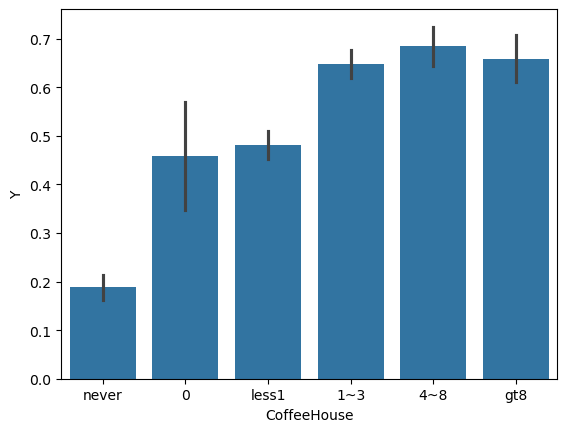

In [76]:
sns.barplot(x = 'CoffeeHouse', y = 'Y', data = ch_coupon_df, order = ['never', '0', 'less1', '1~3', '4~8', 'gt8'])

In [64]:
#print(ch_coupon_df['maritalStatus'].value_counts())
ch_q_single = ch_coupon_df.query('maritalStatus == "Single"')
ch_q_not_single = ch_coupon_df.query('maritalStatus != "Single"')
acceptance_single = ch_q_single['Y'].sum()/ch_q_single.shape[0]
acceptance_not_single = ch_q_not_single['Y'].sum()/ch_q_not_single.shape[0]
print("Acceptance rate for single drivers " + str(acceptance_single))
print("Acceptance rate for drivers not single " + str(acceptance_not_single))

Acceptance rate for single drivers 0.5161290322580645
Acceptance rate for drivers not single 0.4885527391659853


In [66]:
ch_q_8_plus = ch_coupon_df.query('CoffeeHouse == "gt8"')
ch_q_4_plus = ch_coupon_df.query('CoffeeHouse in @status_4_or_greater')
ch_q_3_or_less = ch_coupon_df.query('CoffeeHouse in @status_3_or_less')
acceptance_8_plus = ch_q_8_plus['Y'].sum()/ch_q_8_plus.shape[0]
acceptance_4_plus = ch_q_4_plus['Y'].sum()/ch_q_4_plus.shape[0]
acceptance_3_or_less = ch_q_3_or_less['Y'].sum()/ch_q_3_or_less.shape[0]
print("Acceptance rate for drivers who visit a Coffee Shop 8 or more times " + str(acceptance_8_plus))
print("Acceptance rate for drivers who visit a Coffee Shop 4 or more times " + str(acceptance_4_plus))
print("Acceptance rate for drivers who visit a Coffee Shop 3 or less times " + str(acceptance_3_or_less))

Acceptance rate for drivers who visit a Coffee Shop 8 or more times 0.6578947368421053
Acceptance rate for drivers who visit a Coffee Shop 4 or more times 0.675
Acceptance rate for drivers who visit a Coffee Shop 3 or less times 0.44940867279894875


In [68]:
#print(ch_coupon_df['gender'].value_counts())
ch_q_male = ch_coupon_df.query('gender == "Male"')
ch_q_female = ch_coupon_df.query('gender == "Female"')
acceptance_male = ch_q_male['Y'].sum()/ch_q_male.shape[0]
acceptance_female = ch_q_female['Y'].sum()/ch_q_female.shape[0]
print("Acceptance rate for male drivers " + str(acceptance_male))
print("Acceptance rate for female drivers " + str(acceptance_female))

Acceptance rate for male drivers 0.506426735218509
Acceptance rate for female drivers 0.492442710872745


In [70]:
print(ch_coupon_df['destination'].value_counts())

destination
No Urgent Place    2155
Home                928
Work                913
Name: count, dtype: int64


In [74]:
ch_q_work = ch_coupon_df.query('destination == "Work"')
ch_q_home = ch_coupon_df.query('destination == "Home"')
ch_q_other = ch_coupon_df.query('destination == "No Urgent Place"')
acceptance_work = ch_q_work['Y'].sum()/ch_q_work.shape[0]
acceptance_home = ch_q_home['Y'].sum()/ch_q_home.shape[0]
acceptance_other = ch_q_other['Y'].sum()/ch_q_other.shape[0]
print("Acceptance rate for drivers heading to work " + str(acceptance_work))
print("Acceptance rate for drivers heading home " + str(acceptance_home))
print("Acceptance rate for drivers heading to other destinations " + str(acceptance_other))

Acceptance rate for drivers heading to work 0.4457831325301205
Acceptance rate for drivers heading home 0.3620689655172414
Acceptance rate for drivers heading to other destinations 0.5809744779582366


In [79]:
ch_q_dir_same = ch_coupon_df.query('direction_same == 1')
ch_q_dir_opp = ch_coupon_df.query('direction_opp == 1')
acceptance_dir_same = ch_q_dir_same['Y'].sum()/ch_q_dir_same.shape[0]
acceptance_dir_opp = ch_q_dir_opp['Y'].sum()/ch_q_dir_opp.shape[0]
print("Acceptance rate for coffee houses in the same direction as destination " + str(acceptance_dir_same))
print("Acceptance rate for coffee houses in the opposite direction as destination " + str(acceptance_dir_opp))

Acceptance rate for coffee houses in the same direction as destination 0.5306666666666666
Acceptance rate for coffee houses in the opposite direction as destination 0.49199014171287736


In [89]:
combined_query = ch_coupon_df.query('CoffeeHouse in @status_4_or_greater & destination == "No Urgent Place" & income in @under_50k')
acceptance_combined = combined_query['Y'].sum()/combined_query.shape[0]
print(str(acceptance_combined))

0.7379032258064516


### Findings
The greatest individual factor found that impacts the coffee shop coupon acceptance rate was whether a driver had visited a coffee shop 4 or more times. These individuals had a coupon acceptance rate of 67.5%. Combining this population with the drivers heading some place other than home or work, and having an income of under 50k per year brought the acceptance rate up to 73.7%

the greatest individual factor found that impacts the bar coupon acceptance rate was whether a driver had been to a bar 4 or more times. These individuals had a coupon acceptance rate of 76.9%

### Actionable Items
The factors that led to the highest coffee shop coupon acceptance rates were:
- The driver visited a coffee shop 4 or more times: 67.5%
- The driver is heading someplace other than work or home: 58.1%
- The driver is heading in the same direction as the coffee shop: 53.1%
- The driver has an income of under 50k: 52.3%

The factor that led to the highest bar coupon acceptance rate was:
- The driver visited a bar 4 or more times: 76.9%

### Recommendations
The greatest success rate in coupon usage will come from drivers who fall into one or more of the categories listed under actionable items.